In [1]:
#-----------
# Data cleaning for dev dataset
#-----------

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# use only for dictionary parsing...
import ast

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
dataDevPlutchik = pd.read_csv('dataset/dev/emotion/allcharlinepairs-original.csv')

# Check data basic info

In [3]:
print("Shape info: ", dataDevPlutchik.shape)
dataDevPlutchik

Shape info:  (53234, 9)


,storyid,linenum,char,emotionworkerid,context,sentence,affected,emotion,plutchik
0,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann0,NaN,I began making fish curry for my boyfriend and I.,yes,"[""Joy and excited to be making the food""]","[""joy:3"", ""trust:3"", ""surprise:3"", ""anticipati..."
1,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann1,NaN,I began making fish curry for my boyfriend and I.,yes,"[""content""]","[""joy:2""]"
2,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann2,NaN,I began making fish curry for my boyfriend and I.,yes,"[""hungry"", ""anticipation""]","[""joy:2"", ""anticipation:3""]"
3,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,Boyfriend,none,NaN,I began making fish curry for my boyfriend and I.,no,"[""none""]","[""none""]"
4,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,2,I (myself),ann0,I began making fish curry for my boyfriend and I.,I decided not to read a recipe since I've made...,yes,"[""I decided not to read a recipe since I've ma...","[""joy:2"", ""trust:2"", ""fear:3"", ""surprise:3"", ""..."
...,...,...,...,...,...,...,...,...,...
53229,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,4,Crab,none,Marcus was collecting shells on the beach.|He ...,Suddenly he felt a sharp pinch.,no,"[""none""]","[""none""]"
53230,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,5,Marcus,ann0,Marcus was collecting shells on the beach.|He ...,A crab was inside the shell pinching his leg.,yes,"[""shocked""]","[""fear:2"", ""surprise:3"", ""anticipation:3""]"
53231,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,5,Marcus,ann1,Marcus was collecting shells on the beach.|He ...,A crab was inside the shell pinching his leg.,yes,"[""surprised""]","[""fear:2"", ""surprise:3"", ""anticipation:2""]"
53232,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,5,Marcus,ann2,Marcus was collecting shells on the beach.|He ...,A crab was inside the shell pinching his leg.,yes,"[""pained ""]","[""fear:3"", ""surprise:3"", ""anticipation:3""]"


# Start modification

## 1. emotion
### 1.1 Basic Filter

In [4]:
# emotion col analyze
# invalid data in emotion
# 0. not a emotion
# 0.1 same as sentence
dataDevPlutchik = dataDevPlutchik[[x.strip('[').strip(']').strip('\"').strip().replace(".", "") + "." 
                                   for x in dataDevPlutchik['emotion']] != dataDevPlutchik['sentence']]

In [5]:
# 0.2 like something...
dataDevPlutchik = dataDevPlutchik[~ dataDevPlutchik['emotion'].str.lower().str.contains("like")]

# 1. juxtaposition
connectorList = [" and also ", " and ", " but "]
for connector in connectorList:
    dataDevPlutchik['emotion'] = dataDevPlutchik['emotion'].str.lower().str.replace(connector, "\", \"") # btw, all lower case conversion here...
    
# 2. adverb（no need to delete, optional）: consistency
decoratorList = ["very ", " a lot", " a bit", "a bit ", "little bit ", "little ", "so ", "bit ", "much ", "really "]
for decorator in decoratorList:
    dataDevPlutchik['emotion'] = dataDevPlutchik['emotion'].str.replace(decorator, "")
    
# 3. purpose and reason
reasonIndentifierList = [" to", " that", " (", " about", " of", " for", " at", " in", 
                         " with", " by", " while", " on", " from", " if", " when", ": ", " since"]
for reasonIndentifier in reasonIndentifierList:
    dataDevPlutchik['emotion'] = dataDevPlutchik['emotion'].str.partition("\"]")[0].str.partition(reasonIndentifier)[0]+ "\"]"
    

# 4. Special case: delete clause
identityList = [" they", " he", " hes", " someone", " she", " i"]
for identity in identityList:
    dataDevPlutchik['emotion'] = dataDevPlutchik['emotion'].str.partition("\"]")[0].str.partition(identity)[0]+ "\"]"

In [6]:
# remove none annotator
dataDevPlutchik = dataDevPlutchik[~ (dataDevPlutchik['emotionworkerid'].str.contains("none"))]

In [7]:
# remove emotion unstandard none row
noneIndicatorList = ["none", "nothing", "unsure", "n/a", "not sure", "not applicable", "no emotion"]
for noneIndicator in noneIndicatorList:
    dataDevPlutchik = dataDevPlutchik[~ (dataDevPlutchik['emotion'].str.contains(noneIndicator))]
    print("None Case deleted, current shape info update to:", dataDevPlutchik.shape)

None Case deleted, current shape info update to: (43094, 9)
None Case deleted, current shape info update to: (43076, 9)
None Case deleted, current shape info update to: (43065, 9)
None Case deleted, current shape info update to: (43062, 9)
None Case deleted, current shape info update to: (43046, 9)
None Case deleted, current shape info update to: (43023, 9)
None Case deleted, current shape info update to: (43019, 9)


In [4]:
# change and prsing the info in emotion & plutchik, for later usage
dataDevPlutchik['emotion'] = [list(i.strip() for i in (x.strip('[').strip(']').strip('\"').strip().replace("\", \"", ", ").split(', '))) 
                              for x in dataDevPlutchik['emotion']]


In [5]:
dataDevPlutchik['plutchik'] = [ast.literal_eval(x.replace(":", "\" : ").replace("\",", ",").replace("[", "{").replace("\"]", "}").replace("]", "}")) 
                               if "none" not in x else {} for x in dataDevPlutchik['plutchik']]

### 1.2 Typo correction

In [10]:
import enchant
from enchant.checker import SpellChecker
#english_vocab = set(w.lower() for w in nltk.corpus.words.words())
d = enchant.Dict("en_US")

In [11]:
emotions = [[str1.strip("\"") for str1 in x] for x in dataDevPlutchik['emotion']]
for i in range(len(emotions)):
    for j in range(len(emotions[i])):
        word = emotions[i][j]
        word = word.strip('.').strip(';').strip(',')
        chkr = SpellChecker("en_US")
        chkr.set_text(word)
        for err in chkr:
            sug = err.suggest()[0]
            err.replace(sug)
        emotions[i][j] = chkr.get_text() #returns corrected text
    print("\r", end="")
    print("1.2 Typo correction -> Start checking, current progress: {}/{} ".format(i+1, len(emotions)), end="")

1.2 Typo correction -> Start checking, current progress: 43019/43019 

In [12]:
# todo: CLEANING.
wrongwords = []
for lw in emotions:
    for word in lw:
        if(word.find(' ') == -1 and len(word)>0 and d.check(word)==False): 
            wrongwords.append(word)
wrongwords

['VA!idated', '\\pouffe\\ufeffreassured']

In [13]:
dataDevPlutchik['emotion'] = emotions
dataDevPlutchik['emotion']

0                [joy, excited]
1                     [content]
2        [hungry, anticipation]
5                     [excited]
6                   [confident]
                  ...          
53227                    [sore]
53228               [surprised]
53230                 [shocked]
53231               [surprised]
53232                  [pained]
Name: emotion, Length: 43019, dtype: object

### 1.3 Other explicit delete

In [14]:
# special change for dev
dataDevPlutchik['emotion'][23092] = ['happy', 'excited'] # original ['happy ND excited']
dataDevPlutchik['emotion'][23173] = ['happy', 'excited'] # original ['happy db excited']
dataDevPlutchik['emotion'][318] = ['happy', 'excited'] # original ['excited happy']
dataDevPlutchik['emotion'][447] = ['happy', 'excited'] # original ['excited happy']
dataDevPlutchik['emotion'][41910] = ['nervous'] # original ['nervous not reaching target']
dataDevPlutchik['emotion'][341] = ['annoyed', 'agitated'] # original ['annoyed', 'agitated. i feel']
dataDevPlutchik['emotion'][4582] = ['fear'] # original ['something is coming', 'fear']
dataDevPlutchik['emotion'][7144] = ['fulfilled', 'happy', 'peaceful'] # original ['his desire fulfilled', 'happy', 'peaceful']
dataDevPlutchik['emotion'][7622] = ['interested', 'pleased'] # original ['interested it meeting this new person', 'please']
dataDevPlutchik['emotion'][8060] = ['upset', 'worried', 'rushed'] # original ['upset', 'worried', 'rushed']
dataDevPlutchik['emotion'][8435] = ['relaxed', 'enjoyed'] # original ['relaxed', 'enjoying the weather']
dataDevPlutchik['emotion'][9883] = ['self-conscious', 'wondering'] # original ['self conscious', 'wondering what others will think']
dataDevPlutchik['emotion'][10955] = ['rushed', 'frustrated'] # original ['in a rush', 'frustrated']
dataDevPlutchik['emotion'][11674] = ['relieved'] # original ['relieved', 'less self conscious']
dataDevPlutchik['emotion'][21821] = ['glad', 'scared'] # original ['glad is trying', 'scared jimmy may turn over the ball']
dataDevPlutchik['emotion'][31424] = ['excited', 'nervous'] # original ['excited', 'also  nervous']
dataDevPlutchik['emotion'][31890] = ['lonely', 'missed', 'enjoy'] # original ['feel lonely', 'miss u family', 'and enjoy']
dataDevPlutchik['emotion'][36175] = ['sad', 'anxious'] # original ['Ryan felt sad', 'his temperature lowered', 'he felt anxious']
dataDevPlutchik['emotion'][39543] = ['glad'] # original ['he is accepted', 'glad']
dataDevPlutchik['emotion'][43266] = ['scared'] # original ['scaring', 'to scratch him']
dataDevPlutchik['emotion'][45842] = ['happy'] # original ['happy', 'in fun mood']
dataDevPlutchik['emotion'][45991] = ['trusted', 'happy'] # original ['he could trust me', 'happy']
dataDevPlutchik['emotion'][46135] = ['happy', 'hurried'] # original ['happy', 'in a hurry']
dataDevPlutchik['emotion'][46614] = ['relieved'] # original ['relieved', 'at peace now']
dataDevPlutchik['emotion'][786] = ['sad', 'angry', 'afraid'] # original ['sad ,angry', 'afraid']
dataDevPlutchik['emotion'][803] = ['determined', 'self-conscious'] # original ['determined', 'self conscious']
dataDevPlutchik['emotion'][996] = ['sad', 'frustrated'] # original ['sad frustrated']
dataDevPlutchik['emotion'][1295] = ['unhappy', 'succor'] # original ['UN happy', 'succor']
dataDevPlutchik['emotion'][1408] = ['disappointed'] # original ['disappointed', 'let down']
dataDevPlutchik['emotion'][1427] = ['comfort', 'well-satisfied'] # original ['comfort', 'well satisfied']
dataDevPlutchik['emotion'][1538] = ['unjerry'] # original ['UN jerry']
dataDevPlutchik['emotion'][1738] = ['same'] # original ['no different']
dataDevPlutchik['emotion'][1971] = ['same'] # original ['no different']
dataDevPlutchik['emotion'][2153] = ['happy', 'excited', 'fulfills'] # original ['much happy', 'excited', 'fulfills']
dataDevPlutchik['emotion'][2214] = ['scared', 'confident'] # original ['slightly scared', 'but confident']
dataDevPlutchik['emotion'][2267] = ['proud'] # original ['proud', 'good son']
dataDevPlutchik['emotion'][2707] = ['hopeless', 'troubled'] # original ['hopeless troubled']
dataDevPlutchik['emotion'][2985] = ['surprising', 'happy'] # original ['surprising', 'happily', 'feel good']
dataDevPlutchik['emotion'][3071] = ['self-conscious'] # original ['self conscious']
dataDevPlutchik['emotion'][3547] = ['depressed', 'disappointment'] # original ['depressed', 'dis appointment']
dataDevPlutchik['emotion'][3547] = ['happy', 'lively'] # original ['happy', 'and lively']


In [15]:
# other cleanning
listTotal = dataDevPlutchik['emotion']
print("curious data still...")
for index, value in listTotal.items():
    if (len(value) == 1 and value[0].count(" ") > 1):
        dataDevPlutchik = dataDevPlutchik.drop(index = index)
        print("going to remove: ", value, " @",  index)
    else:
        dataDevPlutchik['emotion'][index] = list(emotion for emotion in dataDevPlutchik['emotion'][index] if emotion.count(" ") < 1)

curious data still...
going to remove:  ['Hannah rash kin']  @ 394
going to remove:  ['James was asked']  @ 413
going to remove:  ['he was stuck']  @ 473
going to remove:  ['tom was discussing music']  @ 828
going to remove:  ['my son loves bedtime stories']  @ 1268
going to remove:  ['several people were walking around the mall']  @ 1348
going to remove:  ['Ashley loved Facebook']  @ 1439
going to remove:  ['Ashley loved Facebook']  @ 1442
going to remove:  ['Shawn was driving along a country road late']  @ 1714
going to remove:  ['Hannah rash kin']  @ 1814
going to remove:  ['in a hurry']  @ 1929
going to remove:  ['Larry Dwayne amused after seeing']  @ 2043
going to remove:  ['Hannah rash kin']  @ 2437
going to remove:  ['she went back outside']  @ 2603
going to remove:  ['Hannah rash kin']  @ 2781
going to remove:  ['our cousins came']  @ 2785
going to remove:  ['Hannah rash kin']  @ 2811
going to remove:  ['my dog owners']  @ 2858
going to remove:  ['Ronny deserves better']  @ 321

In [16]:
# optinal, only cleaning sentence
listTotal = dataDevPlutchik['emotion']
print("curious data still...")
for index, value in listTotal.items():
    if (len(value) == 1 and value[0].count(" ") > 1):
        dataDevPlutchik = dataDevPlutchik.drop(index = index)
        print("going to remove: ", value, " @",  index)

curious data still...


In [6]:
# re-index
dataDevPlutchik = dataDevPlutchik.reset_index(drop=True)
dataDevPlutchik.index.names = ['index']
dataDevPlutchik = dataDevPlutchik.reset_index()

### 1.4 Check distribution

In [7]:
dataDevPlutchik

,index,storyid,linenum,char,emotionworkerid,context,sentence,affected,emotion,plutchik
0,0,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann0,NaN,I began making fish curry for my boyfriend and I.,yes,[Joy and excited to be making the food],"{'joy': 3, 'trust': 3, 'surprise': 3, 'anticip..."
1,1,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann1,NaN,I began making fish curry for my boyfriend and I.,yes,[content],{'joy': 2}
2,2,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann2,NaN,I began making fish curry for my boyfriend and I.,yes,"[hungry, anticipation]","{'joy': 2, 'anticipation': 3}"
3,3,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,Boyfriend,none,NaN,I began making fish curry for my boyfriend and I.,no,[none],{}
4,4,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,2,I (myself),ann0,I began making fish curry for my boyfriend and I.,I decided not to read a recipe since I've made...,yes,[I decided not to read a recipe since I've mad...,"{'joy': 2, 'trust': 2, 'fear': 3, 'surprise': ..."
...,...,...,...,...,...,...,...,...,...,...
53229,53229,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,4,Crab,none,Marcus was collecting shells on the beach.|He ...,Suddenly he felt a sharp pinch.,no,[none],{}
53230,53230,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,5,Marcus,ann0,Marcus was collecting shells on the beach.|He ...,A crab was inside the shell pinching his leg.,yes,[shocked],"{'fear': 2, 'surprise': 3, 'anticipation': 3}"
53231,53231,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,5,Marcus,ann1,Marcus was collecting shells on the beach.|He ...,A crab was inside the shell pinching his leg.,yes,[surprised],"{'fear': 2, 'surprise': 3, 'anticipation': 2}"
53232,53232,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,5,Marcus,ann2,Marcus was collecting shells on the beach.|He ...,A crab was inside the shell pinching his leg.,yes,[pained],"{'fear': 3, 'surprise': 3, 'anticipation': 3}"


In [19]:
# check the content status
# count related
# for every emotion x, record the freq at whole dict X[x]
# and for the same case, check other emotions y_i \in {[y1, ..., yn], s.t. yi != x},
# record the freq at dict Y[x][yi]
emotionSum = {}
for dataRow in dataDevPlutchik['emotion']:
    for emotion in dataRow:
        if emotion in emotionSum:
            relatedEmotionDict = emotionSum.get(emotion)[1];
            for relatedEmotion in dataRow:
                if relatedEmotion != emotion:
                    relatedEmotionDict[relatedEmotion] = relatedEmotionDict.get(relatedEmotion, 0) + 1
            emotionSum[emotion] = [emotionSum.get(emotion)[0]+1, relatedEmotionDict];
        else:
            emotionSum[emotion] = [1, {}];

In [20]:
emotionDF = pd.DataFrame(list(zip(emotionSum.keys(),[x[0] for x in emotionSum.values()], 
                                  [list(x[1].keys())[0:5] for x in emotionSum.values()],[x[1] for x in emotionSum.values()])), 
                         columns = ['emotion','freq','highly related', 'all related info'])
emotionDFTop40 = emotionDF.sort_values(by=['freq'], na_position='first', ascending=False)[0:40]

In [21]:
emotionDFTop40

,emotion,freq,highly related,all related info
14,happy,4883,"[pleased, content, nostalgic, excited, enterta...","{'pleased': 16, 'content': 63, 'nostalgic': 5,..."
1,excited,2546,"[overjoyed, hopeful, happy, relieved, pleased]","{'overjoyed': 8, 'hopeful': 30, 'happy': 349, ..."
12,sad,1815,"[failed, scared, anger, embarrassed, disappoin...","{'failed': 1, 'scared': 28, 'anger': 9, 'embar..."
36,proud,1325,"[elated, excited, comforted, honored, happy]","{'elated': 4, 'excited': 35, 'comforted': 1, '..."
51,scared,1083,"[sad, failed, ambitious, hopeful, worried]","{'sad': 28, 'failed': 1, 'ambitious': 1, 'hope..."
27,angry,1075,"[paranoid, shocked, incredulous, confused, upset]","{'paranoid': 1, 'shocked': 16, 'incredulous': ..."
79,disappointed,979,"[sad, frustrated, angry, upset, irritated]","{'sad': 59, 'frustrated': 19, 'angry': 38, 'up..."
30,relieved,967,"[free, liberated, happy, excited, nervous]","{'free': 2, 'liberated': 1, 'happy': 99, 'exci..."
78,nervous,913,"[anxious, relieved, happy, excited, hopeful]","{'anxious': 39, 'relieved': 8, 'happy': 19, 'e..."
24,annoyed,895,"[irritable, angry, agitated, sad, frustrated]","{'irritable': 2, 'angry': 33, 'agitated': 1, '..."


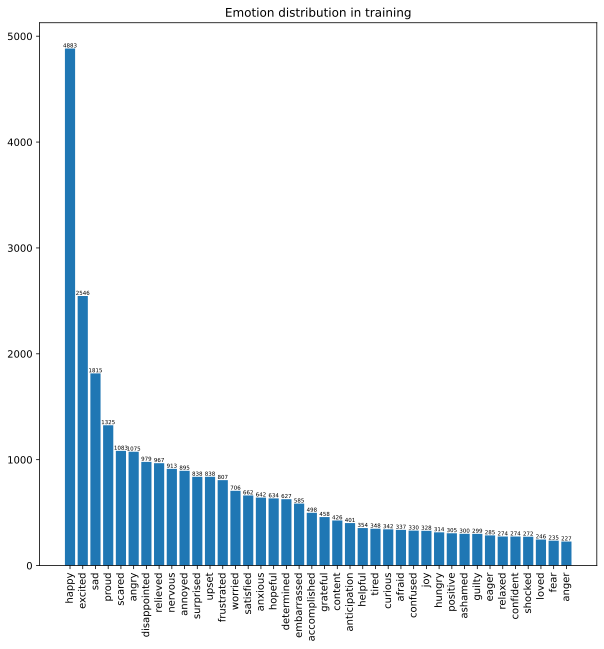

In [22]:
plt.rcParams['figure.figsize'] = (10.0, 10.0) 
plt.bar(emotionDFTop40['emotion'], emotionDFTop40['freq'])
plt.xticks(rotation=90)
plt.title("Emotion distribution in training")
for emotion, freq in zip(emotionDFTop40['emotion'], emotionDFTop40['freq']):
    plt.text(emotion, freq, freq, ha='center', va='bottom', fontsize=5.5)
plt.show()

## 2. plutchik
### 2.1 Standard plutchik(including no emotion case)

In [8]:
for index, row in dataDevPlutchik.iterrows():
    tempalteOrder = {'joy' : 0, 'trust' : 0, 'fear' : 0, 'surprise' : 0, 'sadness' : 0, 'disgust' : 0, 'anger' : 0, 'anticipation' : 0}
    for key, value in row['plutchik'].items():
        tempalteOrder[key] = value
    dataDevPlutchik['plutchik'][index] = tempalteOrder.copy()
    print("\r", end="")
    print("2.1 Standard plutchik(including no emotion case) -> start conversion, current progress: {}/{} ".format(index+1, dataDevPlutchik.shape[0]), end="")

2.1 Standard plutchik(including no emotion case) -> start conversion, current progress: 53234/53234 

### 2.2 Voting

In [9]:
# add weight to emotion, express degree
# confirm the def of synonym
mainPosIndex = pd.Series(False, index = dataDevPlutchik.index)
for index, row in dataDevPlutchik.iterrows():
    if (index == 0 or currentEditting['sentence'] != row['sentence']): # case: new sentence, update CURRENT adding
        if (index != 0):
            for key in currentEditting['plutchik']:
                # print(index - currentEditting[0], "previous: ", currentEditting[1]['plutchik'][key])
                currentEditting['plutchik'][key] //= index - currentEditting[0]
            for i in range(currentEditting['index'] + 1, index):
                for emotion in dataDevPlutchik['emotion'][i]:
                    if not emotion in dataDevPlutchik['emotion'][currentEditting['index']]:
                        dataDevPlutchik['emotion'][currentEditting['index']].append(emotion)
        currentEditting = dataDevPlutchik.iloc[index]
        mainPosIndex[currentEditting['index']] = True
    else: # case: same as previous sentence, do voting
        for key, value in dataDevPlutchik['plutchik'][index].items():
            dataDevPlutchik['plutchik'][currentEditting['index']][key] += value
    print("\r", end="")
    print("2.2 Voting -> start voting, current progress: {}/{} ".format(index+1, dataDevPlutchik.shape[0]), end="")
    
# dealing last case
for key in currentEditting['plutchik']:
    # print(index - currentEditting[0], "previous: ", currentEditting[1]['plutchik'][key])
    currentEditting['plutchik'][key] //= index - currentEditting[0]
for i in range(currentEditting['index'] + 1, index):
    for emotion in dataDevPlutchik['emotion'][i]:
        if not emotion in dataDevPlutchik['emotion'][currentEditting['index']]:
            dataDevPlutchik['emotion'][currentEditting['index']].append(emotion)

2.2 Voting -> start voting, current progress: 53234/53234 

In [10]:
dataDevPlutchik = dataDevPlutchik[mainPosIndex]
dataDevPlutchik = dataDevPlutchik.drop(labels='index',axis=1)
dataDevPlutchik = dataDevPlutchik.reset_index(drop=True)

# Finish

In [11]:
dataDevPlutchik

,storyid,linenum,char,emotionworkerid,context,sentence,affected,emotion,plutchik
0,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann0,NaN,I began making fish curry for my boyfriend and I.,yes,"[Joy and excited to be making the food, conten...","{'joy': 1, 'trust': 0, 'fear': 0, 'surprise': ..."
1,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,2,I (myself),ann0,I began making fish curry for my boyfriend and I.,I decided not to read a recipe since I've made...,yes,[I decided not to read a recipe since I've mad...,"{'joy': 1, 'trust': 2, 'fear': 0, 'surprise': ..."
2,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,3,I (myself),ann0,I began making fish curry for my boyfriend and...,I let the curry sit before tasting.,yes,"[anxious, confident, positive, none]","{'joy': 1, 'trust': 1, 'fear': 0, 'surprise': ..."
3,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,4,I (myself),ann0,I began making fish curry for my boyfriend and...,"When it was time to taste, I was disgusted.",yes,"[When it was time to taste, I was disgusted., ...","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ..."
4,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,5,I (myself),ann0,I began making fish curry for my boyfriend and...,I accidentally used a whole garlic instead of ...,yes,[I accidentally used a whole garlic instead of...,"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ..."
...,...,...,...,...,...,...,...,...,...
12410,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,1,Marcus,ann0,NaN,Marcus was collecting shells on the beach.,yes,"[intrigued, happy, contemplative, none]","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ..."
12411,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,2,Marcus,ann0,Marcus was collecting shells on the beach.,He picked up a large beautiful shell.,yes,"[awestruck, moved, joy, none]","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ..."
12412,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,3,Marcus,ann0,Marcus was collecting shells on the beach.|He ...,He put it in his pocket to save for later.,yes,"[satisfied, excited, curiosity, none]","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ..."
12413,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,4,Marcus,ann0,Marcus was collecting shells on the beach.|He ...,Suddenly he felt a sharp pinch.,yes,"[pained, sore, surprised, none]","{'joy': 1, 'trust': 0, 'fear': 1, 'surprise': ..."


In [31]:
# output - case: emotion cleaning: full processes
dataDevPlutchik.to_csv('dev/emotion/allcharlinepairs-clean-v1.csv')

In [25]:
# output - case: emotion cleaning: no annotator combination
dataDevPlutchik = dataDevPlutchik.drop(labels='index',axis=1)
dataDevPlutchik.to_csv('dev/emotion/allcharlinepairs-clean-noCombin-v1.csv')

In [30]:
# output - case: emotion cleaning: keep short phases(e.g. "well satisfied") in emotion
dataDevPlutchik.to_csv('dev/emotion/allcharlinepairs-clean-phase-v1.csv')

In [24]:
# output - case: emotion cleaning: no annotator combination + keep short phases(e.g. "well satisfied") in emotion
dataDevPlutchik = dataDevPlutchik.drop(labels='index',axis=1)
dataDevPlutchik.to_csv('dev/emotion/allcharlinepairs-clean-phase-noCombin-v1.csv')

In [17]:
# output - case: only remove cheat sentence in emotion
dataDevPlutchik.to_csv('dev/emotion/allcharlinepairs-original-noCheat-v1.csv')

In [11]:
# output - case: only remove cheat sentence in emotion + no annotator combination
dataDevPlutchik = dataDevPlutchik.drop(labels='index',axis=1)
dataDevPlutchik.to_csv('dev/emotion/allcharlinepairs-original-noCheat-noCombin-v1.csv')

In [12]:
# output - case: no emotion cleaning, no plutchik voting, only stanardrized plutchik data with annotator combination
dataDevPlutchik.to_csv('dev/emotion/allcharlinepairs-original-plutchik-v1.csv')

In [7]:
# output - case: no emotion cleaning, no plutchik voting, only stanardrized plutchik data
dataDevPlutchik.to_csv('dev/emotion/allcharlinepairs-original-plutchik-noCombine-v1.csv')